# Colab tutorial
This is a short tutorial of google colab, for the first assignment, we will use colab to finish the assignment. Google colab is an excutable document which you can edit, execute and share with other people. Basically, it is a jupyter notebook stored in google drive.

In [1]:
print('hello, google colab world:)') #good luck with Colab!

hello, google colab world:)


Since it works with Google drive, if you want to read/write files in Gdrive, you have to mount the drive to this notebook.

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


We can find some code to search or manipulate with our files in Gdrive by searching in Code snippets.

In [3]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.txt' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

Open the directory and show the list of files

In [5]:
%pwd

'/content'

In [6]:
%ls

sample_data/


We can also try some basic numpy operations

In [7]:
import numpy as np
a = np.random.randn(2,3)
print('a:',a)
b = np.random.randn(3,2)
print('b:',b)
print('a dot b:',np.dot(a,b))

a: [[-0.48777533  0.62319166  0.4513829 ]
 [ 0.39266353  0.3053676   0.50258368]]
b: [[ 0.57716807 -0.64360316]
 [-0.84869068 -1.32531413]
 [-0.92440036 -0.33406398]]
a dot b: [[-1.22768381 -0.66278173]
 [-0.49711831 -0.82532259]]


For package installation and upgrade, you could try this:
First check the version of current installed package:
Then upgrade to your desired version

In [8]:
import torch
print('current Pytorch version:',torch.__version__)
!nvcc --version

current Pytorch version: 2.1.0+cu121
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


You can find the corresponding version in their website https://pytorch.org/get-started/locally/

In [9]:
# !pip3 install --upgrade torch torchvision

  Attempting uninstall: torch
    Found existing installation: torch 2.1.0+cu121
    Uninstalling torch-2.1.0+cu121:
      Successfully uninstalled torch-2.1.0+cu121
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.16.0+cu121
    Uninstalling torchvision-0.16.0+cu121:
      Successfully uninstalled torchvision-0.16.0+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.1.0+cu121 requires torch==2.1.0, but you have torch 2.1.2 which is incompatible.
torchdata 0.7.0 requires torch==2.1.0, but you have torch 2.1.2 which is incompatible.
torchtext 0.16.0 requires torch==2.1.0, but you have torch 2.1.2 which is incompatible.


When upgrading process is done, it will require you to restart the runtime. And after restarting the runtime, we can check the version again.

In [10]:
import torch
print('current Pytorch version:',torch.__version__)
!nvcc --version

current Pytorch version: 2.1.0+cu121
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


# Pytorch Tutorial

## First, we try to build a two-layer network with Numpy to start!

In [11]:
import numpy as np
N = 64 # N is batch size;
D_in = 1000 #D_in is input dimension;
H = 100 # H is hidden dimension;
D_out = 10 # D_out is output dimension.

# Create random input and output data
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# Randomly initialize weights
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6
for t in range(500):
    # Forward pass: compute predicted y
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)


    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)   # d(y_pred - y)^2 = 2*(y_pred-y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)

    # Update weights
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

99 285.5075221341625
199 1.0122741769453227
299 0.008720924295874993
399 0.00010925636951703988
499 1.6897404071171278e-06


## Then we swtich from numpy array to tensor!

In [12]:
import torch
dtype = torch.float
# device = torch.device("cpu")
print('check whether GPU is available:',torch.cuda.is_available())
device = torch.device("cuda:0") # Uncomment this to run on GPU

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)
# Randomly initialize weights
w1 = torch.randn(D_in, H, device=device, dtype=dtype)
w2 = torch.randn(H, D_out, device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(500):
    # Forward pass: compute predicted y
    h = x.mm(w1)
    h_relu = h.clamp(min=0)  #clamp elements into certain range
    y_pred = h_relu.mm(w2)  #matrix multiplication without broadcast

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    # Update weights using gradient descent
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

check whether GPU is available: True
99 994.6864013671875
199 7.801217555999756
299 0.0921725183725357
399 0.001557934912852943
499 0.00013070751447230577


## What if we want to build a 100-layer network? Are we going to write a loop to initialize the weight from layer 1 to layer 100?

In [13]:
class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        h_relu = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(h_relu)
        return y_pred


# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# Construct our model by instantiating the class defined above
model = TwoLayerNet(D_in, H, D_out)

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
criterion = torch.nn.MSELoss(reduction='sum') #adopt mean square loss as above
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4) # apply Stochastic gradient descent
for t in range(500):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

99 2.2631096839904785
199 0.0407835878431797
299 0.001454183366149664
399 6.231461156858131e-05
499 2.8767806270479923e-06


## It's time to move to computer vision area: Image classification

### First of all, we need to load the dataset and apply series of image transformation to augment our dataset.

In [14]:
import torchvision
import torchvision.transforms as transforms
transform = transforms.Compose(
    [transforms.ToTensor(),  #transform into tensor
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])   # normalize the mean and std

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)  #CIFAR: Canadian Institute For Advanced Research
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)
# if you have your own data you could do this :
# traindir = './data/train' #load train and val set
# dataset_train = datasets.ImageFolder(traindir,transform=transform)
# valdir = './data/validation/'
# dataset_val = datasets.ImageFolder(valdir,transform=transform)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:05<00:00, 29318869.61it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### build a function to visuslize the data:

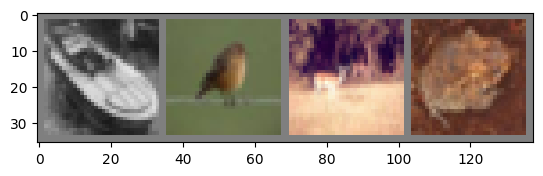

 ship  bird  deer  frog


In [16]:
import matplotlib.pyplot as plt

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### Create a classifcation model

In [17]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # input 32 after conv -> 32 default zero padding
        self.pool = nn.MaxPool2d(2, 2) #after maxpooling input dimension:16
        self.conv2 = nn.Conv2d(6, 16, 5) # input 6 channels output 16 channels
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5) # do you know why the input dim is 16*5*5?
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
if torch.cuda.is_available():
  net.cuda()
  # net.to(device) #you can also use this

### Define loss and optimizer

In [18]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Train our classification model

In [19]:

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        if torch.cuda.is_available():     #feed data into GPU
            inputs = inputs.cuda()
            labels = labels.cuda()
                # inputs, labels = data[0].to(device), data[1].to(device) # alternative way
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.194
[1,  4000] loss: 1.869
[1,  6000] loss: 1.666
[1,  8000] loss: 1.554
[1, 10000] loss: 1.499
[1, 12000] loss: 1.444
[2,  2000] loss: 1.384
[2,  4000] loss: 1.351
[2,  6000] loss: 1.332
[2,  8000] loss: 1.283
[2, 10000] loss: 1.275
[2, 12000] loss: 1.263
Finished Training


### Save our model weight.

In [20]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

### Let's see the test performance!

Show some test images:

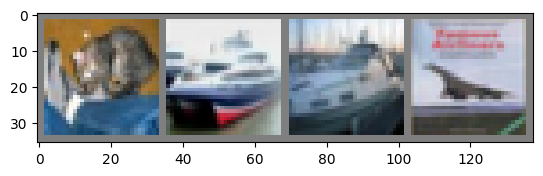

GroundTruth:    cat  ship  ship plane


In [22]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Load our saved model:

In [23]:
net = Net()
net.load_state_dict(torch.load(PATH))
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Let's feed images above into the classifer:

In [24]:
images, labels = images.cuda(), labels.cuda()
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship  ship


We can calculate the average accuracy on testset:

In [25]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 57 %


We can also list the performance of each class

In [26]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 42 %
Accuracy of   car : 65 %
Accuracy of  bird : 45 %
Accuracy of   cat : 46 %
Accuracy of  deer : 48 %
Accuracy of   dog : 44 %
Accuracy of  frog : 63 %
Accuracy of horse : 70 %
Accuracy of  ship : 74 %
Accuracy of truck : 69 %


# good luck with your following assignments and project!
there are series of tutorial of Colab and Pytorch, you can play around with these fun notebooks:
https://colab.research.google.com/notebooks/welcome.ipynb

https://pytorch.org/tutorials/
